# Gráfico de Burbujas
Es un Scatter Plot al cual se le introduce una tercera variable numérica a través del tamaño de cada punto individual. Usualmente, también se introduce una cuarta variable categórica por el color de las burbujas.    
**Eje X**: Variable numérica o categórica ordinal    
**Eje Y**: Variable numérica o categórica ordinal    
**Tamaño de Burbujas**: Variable numérica   
**Color de Burbujas**: Variable categórica    
**Otros nombres**: Bubble Chart

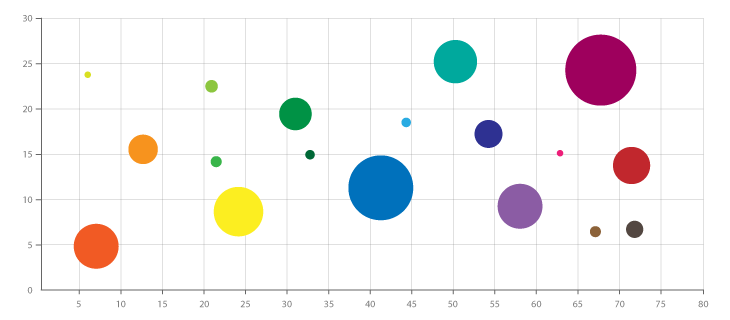

**Ejemplos de Uso**:
- Como un doctor, me gustaría saber si el nivel de colesterol de una persona se correlaciona con su peso. Al mismo tiempo me gustaría saber si la edad de las personas es un factor que influye en alguna de las dos variables.
- Como demográfico, me gustaría saber como se relaciona el nivel de literacy con la expectativa de vida de las personas de los paises del mundo y al mismo tiempo ver la población de estos países (ver imágen)

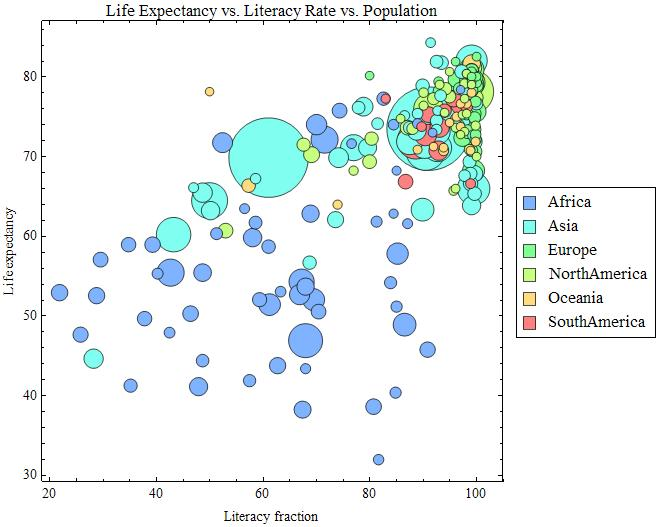

### Cuando utilizar
- Quiero introducir una variable numérica adicional a mi Scatter plot. 


### Consejos
- Puedo introducir una 4ta variable al gráfico con las siguientes técticas:
  - Jugar con la intensidad del color de cada burbuja para introducir una variable numérica.
  - Un color diferente a cada burbuja para introducir una variable categórica
- Si hay una cantidad muy grande de puntos en mi dataset, podemos coger una muestra, o jugar con la opacidad de los puntos
- No son ideales si queremos mostrar resultados con presición ya que debemos inferir "al ojo" el centro de la burbuja para saber los valores exactos correspondientes al eje X y Y.
- Hay que tener mucho cuidado al hacer gráficos de burbuja. Se pueden volver inentendibles rápidamente. A veces no son la mejor opción para comunicar hallazgos. Siempre necesitan estar acompañados de un subtítulo o leyenda que indique que significa el tamaño de las burbujas.


## En esta clase
### Datos
Información sobre paises por año: Expectativa de vida, Población y GDP per Capita
### Objetivos
1. Encontrar una correlación entre el GDP per Capita y la expectativa de vida de los paīses en el año 2002. Además, me gustaría saber si la población del país es un factor que influye en alguna de estas dos variables.

## Referencias
- https://datavizcatalogue.com/ES/metodos/grafico_de_burbujas.html

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style("whitegrid")

In [7]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/paises_vida.csv', index_col='index')
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [8]:
# Eliminamos filas NaNs y filtramos año 2000
df = df.dropna()
df_2002 = df[df['year'] == 2002]
df_2002

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
46,Angola,Africa,2002,41.003,10866106,2773.287312,AGO,24
58,Argentina,Americas,2002,74.340,38331121,8797.640716,ARG,32
...,...,...,...,...,...,...,...,...
1654,Vietnam,Asia,2002,73.017,80908147,1764.456677,VNM,704
1666,West Bank and Gaza,Asia,2002,72.370,3389578,4515.487575,PSE,275
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,YEM,887


In [9]:
# Bubble Charts en Plotly 
# https://plotly.com/python/bubble-charts/
fig = px.scatter(
    df_2002, 
    x="gdpPercap", 
    y="lifeExp",
    
    log_x=True, 
    size="pop", 
    size_max=60,
    color="continent",
    hover_name="country", 
)
fig.show()

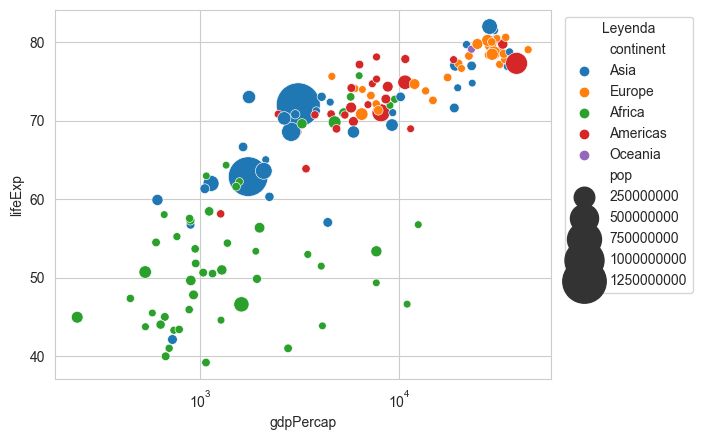

In [10]:
sns.scatterplot(
    data=df_2002,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    hue='continent',
    sizes=(30, 1000),
    legend=True,
    
)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', title='Leyenda')
plt.show()